# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## Import Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'marketing_campaign_data.csv')
pd.set_option('display.max_columns', None)
df = df.drop(['Unnamed: 0'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Preprocessing

In [4]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() *100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
missing_value_df

,column_name,sum_missing,percent_missing
4,Income,24,1.07
0,ID,0,0.00
15,NumDealsPurchases,0,0.00
27,Z_Revenue,0,0.00
26,Z_CostContact,0,0.00
25,Complain,0,0.00
24,AcceptedCmp2,0,0.00
23,AcceptedCmp1,0,0.00
22,AcceptedCmp5,0,0.00
21,AcceptedCmp4,0,0.00


In [5]:
df1 = df.copy()

### Missing Values

In [6]:
df1.dropna(inplace=True)
print('The total rows after removing missing values are', len(df1))

The total rows after removing missing values are 2216


### Duplicate Data

In [7]:
df1.duplicated().sum()

0

### Feature Engineering

In [8]:
df2 = df1.copy()

#### 'days_as_customer'

In [9]:
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])
dates = []
for i in df2['Dt_Customer']:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The latest customer's enrolment date:",max(dates))
print("The oldest customer's enrolment date:",min(dates))

The latest customer's enrolment date: 2014-12-06
The oldest customer's enrolment date: 2012-01-08


In [10]:
days = []
day_max = max(dates)
for i in dates:
    delta = day_max - i
    days.append(delta)
df2['days_as_customer'] = days
df2['days_as_customer'] = pd.to_numeric(df2['days_as_customer'], errors='coerce')

#### 'age' and 'age_gen'

In [11]:
df2['age'] = 2022 - df2['Year_Birth']

In [12]:
age_cond = [(df2['age'] <= 25),
            (df2['age'] > 25) & (df2['age'] <= 40),
            (df2['age'] > 40) & (df2['age'] <= 56),
            (df2['age'] > 56) & (df2['age'] <= 75),
            (df2['age'] > 75)]

age_res = ['Gen Z', 'Millenials', 'Gen X', 'Boomers', 'Silent Gen']

df2['age_gen'] = np.select(age_cond, age_res)

#### 'spendings', 'total_purchase', 'acc_campaign' and 'conversion_rate'

In [13]:
df2['spendings'] = df2['MntCoke'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']

In [14]:
df2['total_purchase'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases']

In [15]:
df2['acc_campaign'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5'] + df2['Response']

In [16]:
df2['conversion_rate'] = round(df2['total_purchase'] / df2['NumWebVisitsMonth'],2)

#### 'total_children','family_members' and 'is_parent'

In [17]:
df2['total_children'] = df2['Kidhome'] + df2['Teenhome']

In [18]:
df2['Marital_Status'].value_counts()

Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64

In [19]:
df2['Marital_Status'] = df2['Marital_Status'].replace({'Janda':'Cerai','Duda':'Cerai'})

In [20]:
df2['family_members'] = df2['Marital_Status'].replace({'Menikah':2,'Bertunangan':1, 'Lajang':1, 'Cerai':1}) + df2['total_children']

In [21]:
df2["is_parent"] = np.where(df2.total_children > 0, 1, 0)

#### Drop Redundant Features

In [22]:
drop_fea = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID', 'Kidhome','Teenhome',
            'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
            'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
            'MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df_drop = df2.drop(drop_fea, axis=1)

In [23]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,3.530300e+07,5.138150e+07,6.852200e+07,6.666660e+08
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
NumWebVisitsMonth,2216.0,5.319043e+00,2.425359e+00,0.0,3.000000e+00,6.000000e+00,7.000000e+00,2.000000e+01
days_as_customer,2216.0,4.423735e+16,2.008532e+16,0.0,2.937600e+16,4.432320e+16,5.927040e+16,9.184320e+16
age,2216.0,5.317960e+01,1.198555e+01,26.0,4.500000e+01,5.200000e+01,6.300000e+01,1.290000e+02
spendings,2216.0,6.070754e+05,6.029005e+05,5000.0,6.900000e+04,3.965000e+05,1.048000e+06,2.525000e+06
total_purchase,2216.0,1.488087e+01,7.670957e+00,0.0,8.000000e+00,1.500000e+01,2.100000e+01,4.400000e+01
acc_campaign,2216.0,4.485560e-01,8.924401e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
conversion_rate,2214.0,inf,NaN,0.0,1.250000e+00,2.670000e+00,5.500000e+00,inf
total_children,2216.0,9.472022e-01,7.490619e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [24]:
with pd.option_context('mode.use_inf_as_na', True):
  df_drop.fillna(df_drop.median())

### Outliers

In [25]:
from matplotlib import colors

<Figure size 800x550 with 0 Axes>

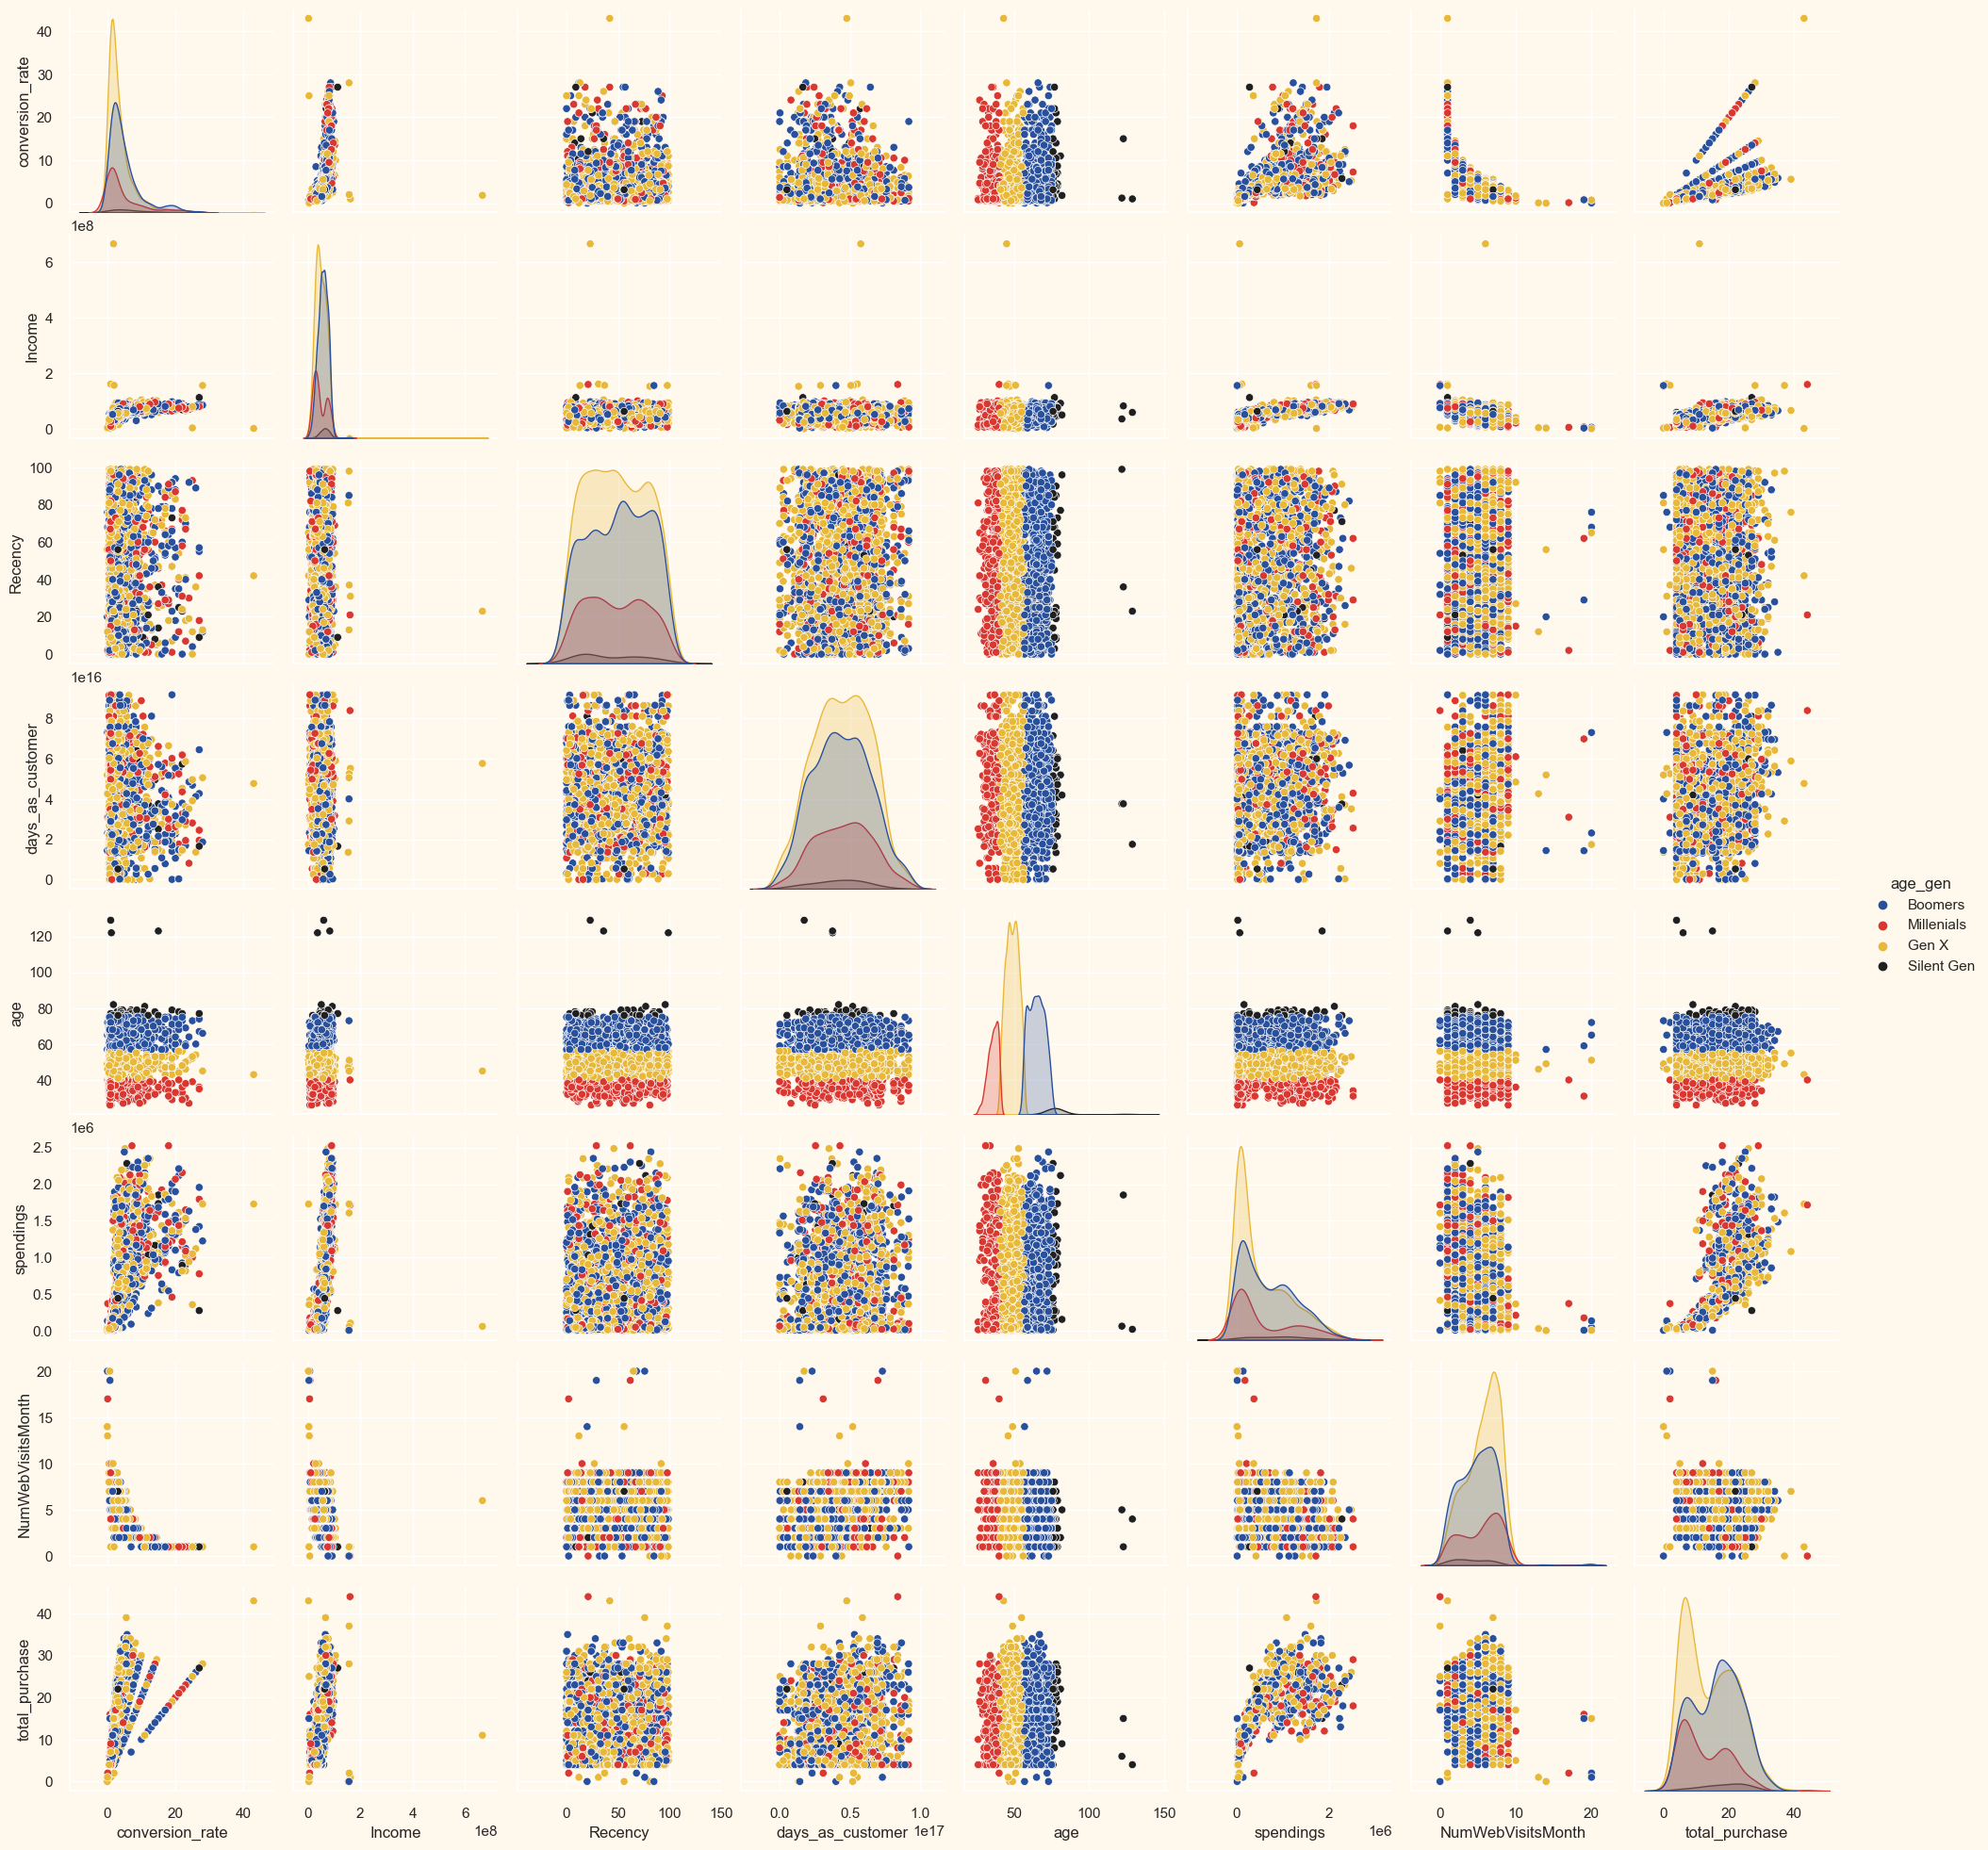

In [71]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
pal = ["#29509C","#D93830", "#E8B838", "#202020"]
to_plot = ["conversion_rate", "Income", "Recency", "days_as_customer", "age", "spendings", "NumWebVisitsMonth",'total_purchase', "age_gen"]
plt.figure()
sns.pairplot(df_drop[to_plot], hue= "age_gen", palette= pal, corner=False)
 
plt.show()

In [27]:
df_out = df_drop[(df2["age"]<90)]
df_out = df_drop[(df2["Income"]<600000000)]

In [28]:
with pd.option_context('mode.use_inf_as_na', True):
  df_out.dropna(inplace=True)

### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
df_lab = df_out.drop('age_gen', axis=1)

In [31]:
s = (df_lab.dtypes == 'object')
objects = list(s[s].index)

print("Categorical variables in the dataset:", objects)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [32]:
LE=LabelEncoder()
for i in objects:
    df_lab[i]=df_lab[[i]].apply(LE.fit_transform)

### Standardization

In [33]:
df_st = df_lab.copy()

In [34]:
df_st.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2205.0,1.579592e+00,1.001197e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Marital_Status,2205.0,1.729705e+00,1.220088e+00,0.0,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
Income,2205.0,5.172498e+07,2.102156e+07,1730000.0,3.519600e+07,5.128700e+07,6.827400e+07,1.623970e+08
Recency,2205.0,4.897642e+01,2.892087e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
NumWebVisitsMonth,2205.0,5.342857e+00,2.404699e+00,1.0,3.000000e+00,6.000000e+00,7.000000e+00,2.000000e+01
days_as_customer,2205.0,4.428268e+16,2.007126e+16,0.0,2.946240e+16,4.432320e+16,5.927040e+16,9.184320e+16
age,2205.0,5.316417e+01,1.198658e+01,26.0,4.500000e+01,5.200000e+01,6.300000e+01,1.290000e+02
spendings,2205.0,6.056939e+05,6.024955e+05,5000.0,6.900000e+04,3.960000e+05,1.044000e+06,2.525000e+06
total_purchase,2205.0,1.485805e+01,7.629718e+00,0.0,8.000000e+00,1.500000e+01,2.100000e+01,4.300000e+01
acc_campaign,2205.0,4.507937e-01,8.941002e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


In [35]:
with pd.option_context('mode.use_inf_as_na', True):
  df_st.dropna(inplace=True)

In [36]:
scaler = StandardScaler()
scaler.fit(df_st)
df_scaled = pd.DataFrame(scaler.transform(df_st),columns= df_st.columns )

In [37]:
df_scaled.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,days_as_customer,age,spendings,total_purchase,acc_campaign,conversion_rate,total_children,family_members,is_parent
0,-0.579030,0.221587,0.305138,0.312080,0.689283,1.974002,0.987647,1.678910,1.329571,0.614395,-0.172121,-1.269790,-1.484438,-1.589969
1,-0.579030,0.221587,-0.256033,-0.379619,-0.142610,-1.668569,1.237984,-0.960713,-1.161256,-0.504301,-0.656718,1.403133,0.736176,0.628943
2,-0.579030,-1.418011,0.946292,-0.794638,-0.558557,-0.174512,0.320083,0.282732,0.805186,-0.504301,0.171391,-1.269790,-1.484438,-1.589969
3,-0.579030,-1.418011,-1.193283,-0.794638,0.273336,-1.926907,-1.265383,-0.917549,-0.899064,-0.504301,-0.630137,0.066672,-0.374131,0.628943
4,1.419031,1.041387,0.312513,1.557138,-0.142610,-0.824664,-1.015046,-0.304958,0.542994,-0.504301,-0.125093,0.066672,0.736176,0.628943


In [38]:
df3s = df_scaled.copy()

In [39]:
hm = df3s.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=1000,height=1000)
fig.show()

## Modelling

### Dimensionality Reduction

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=3)
pca.fit(df3s)
df_pca = pd.DataFrame(pca.transform(df3s), columns=(["col1","col2", "col3"]))
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,4.984675e-17,2.195595,-4.753493,-1.796835,-0.516591,1.287488,6.843727
col2,2205.0,-3.605078e-17,1.298158,-4.088105,-0.871026,0.026045,0.912114,4.594580
col3,2205.0,-1.389667e-17,1.151584,-2.940714,-0.843443,0.005319,0.798264,3.584839


In [43]:
fig = px.scatter_3d(df_pca, x='col1', y='col2', z='col3',
                 template='plotly_dark',width=1000, height=800)
fig.show()

In [44]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

### Elbow Method and Silhouette Score

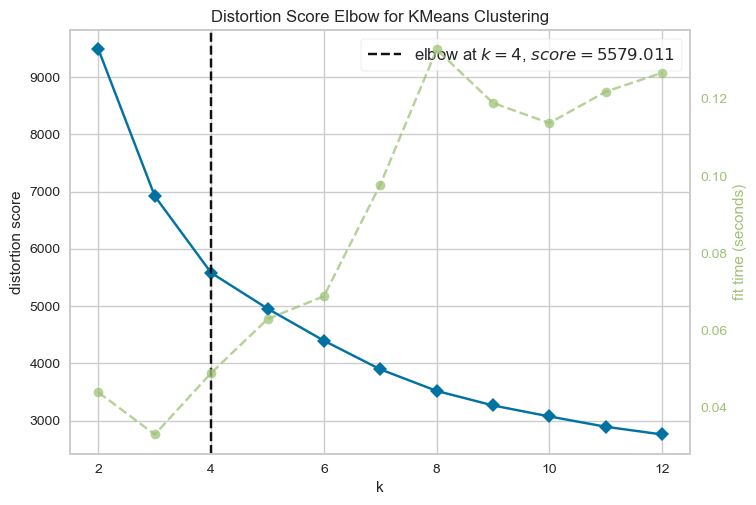

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42),k=12)
Elbow_M.fit(df_pca)
Elbow_M.show()

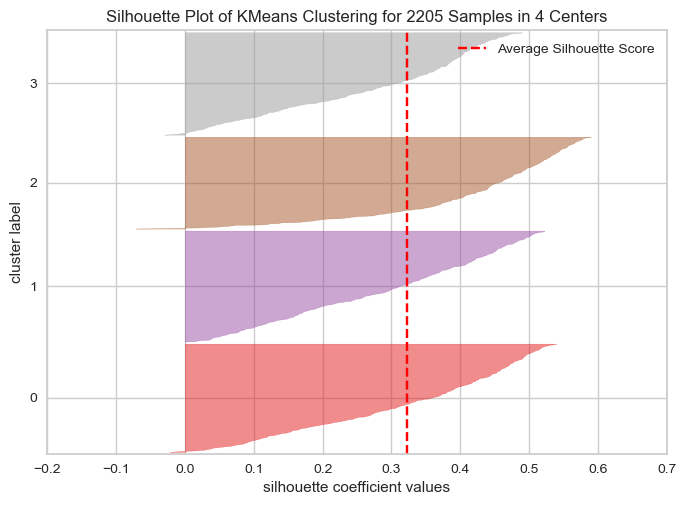

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2205 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4))
visualizer.fit(df_pca)
visualizer.show()

### K-Means Clustering

In [47]:
km = KMeans(n_clusters=4)

ypred_km = km.fit_predict(df_pca)
df_pca['clusters'] = ypred_km

df_out['clusters']= ypred_km

In [48]:
fig = px.scatter_3d(df_pca, x='col1', y='col2', z='col3', color='clusters',
                 template='plotly_dark',width=1200, height=800)
fig.show()

### Evaluating Model

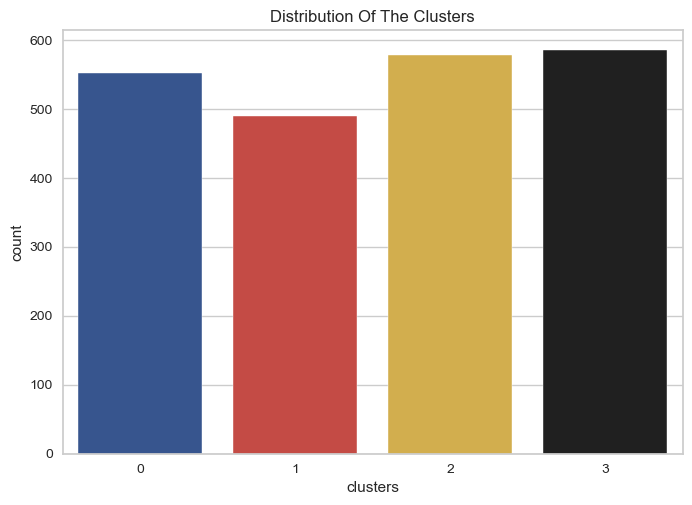

In [70]:
pal = ["#29509C","#D93830", "#E8B838", "#202020"]
pl = sns.countplot(x=df_out['clusters'], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

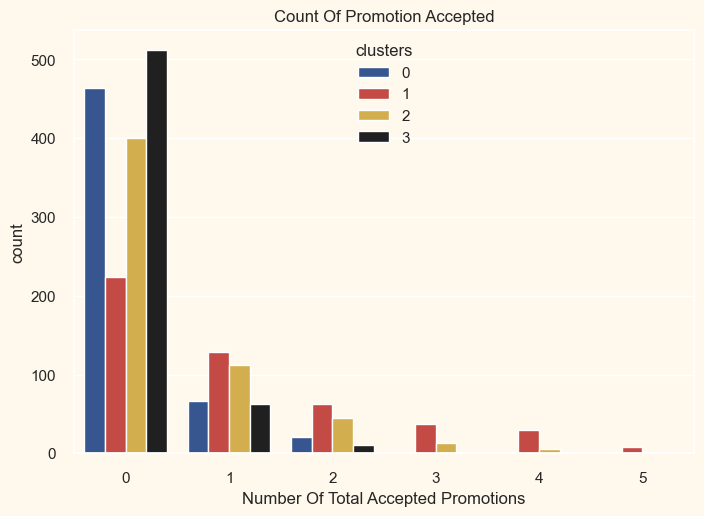

In [96]:
plt.figure()
pl = sns.countplot(x=df_out["acc_campaign"],hue=df_out["clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

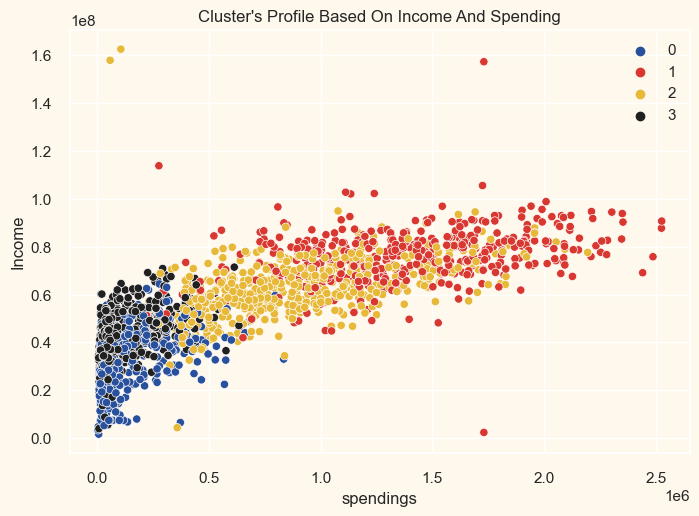

In [100]:
pl = sns.scatterplot(data = df_out,x=df_out["spendings"], y=df_out["Income"],hue=df_out["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

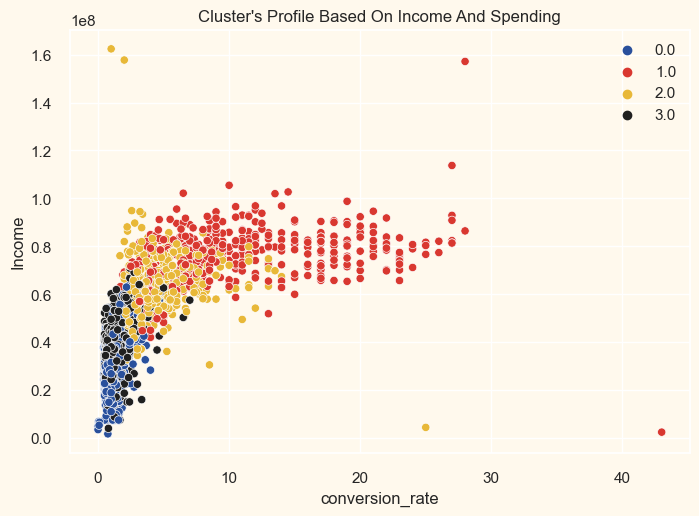

In [115]:
pl = sns.scatterplot(data = df_out,x=df_out["conversion_rate"], y=df_out["Income"],hue=df_out["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

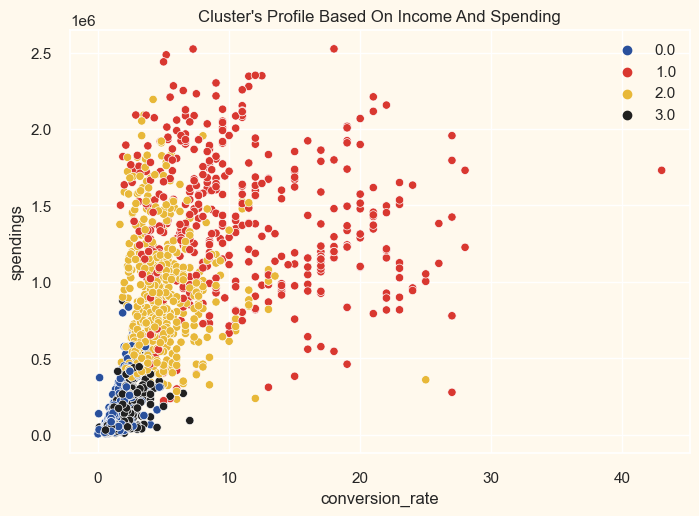

In [116]:
pl = sns.scatterplot(data = df_out,x=df_out["conversion_rate"], y=df_out["spendings"],hue=df_out["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [113]:
df_out['clusters'] = df_out['clusters'].astype(float)
fig = px.scatter_3d(df_out, x='conversion_rate', y='Income', z='spendings', color='clusters',
                 template='plotly_dark',width=1200, height=800, color_continuous_scale='Viridis')
fig.show()

## Conversion Rate Analysis Based on Income, Spending and Age

In [114]:
fig = px.scatter_3d(df_out, x='conversion_rate', y='Income', z='spendings', color='age_gen',
                 template='plotly_dark',width=1200, height=800)
fig.show()